#  Exploración y Preprocesamiento de Datos para la Detección de Fraudes

En este cuaderno (notebook), se aborda la exploración y preprocesamiento de datos para la detección de fraudes. La finalidad principal es realizar un análisis integral y una preparación eficiente de los datos antes de aplicar modelos de machine learning. El enfoque se centra en comprender la estructura de los datos, identificar patrones significativos y aplicar técnicas de preprocesamiento para mejorar la calidad de la información.

El desarrollo del notebook se organiza en varias fases clave para abordar de manera sistemática la exploración y el preprocesamiento de datos. La primera etapa engloba la carga de librerías, definición de funciones, lectura del archivo CSV y análisis exploratorio de datos. Aquí se examinan las columnas, tipos de datos y estadísticas descriptivas de las variables, incluyendo la exploración de la variable objetivo y el tratamiento inicial de categorías.

La segunda fase se centra en el análisis de correlación entre variables, identificación de valores missing y manejo de outliers. Estos pasos nos ayudan a obtener una comprensión más completa de la calidad y distribución de los datos.

En la tercera fase, se implementa la ingeniería de variables, incluyendo la aplicación de One-Hot Encoding para variables categóricas. Esta etapa permite adaptar las variables de manera óptima para el modelado.

La cuarta fase comprende el escalado y normalización de variables, mejorando así la consistencia y comparabilidad entre las diferentes magnitudes de las características.

La quinta fase se enfoca en el modelado con algoritmos como Extra Tree Classifier, Lasso y Gradient Boosting Classifier. Aquí se evalúa la importancia de cada variable con respecto a la variable objetivo, proporcionando percepciones valiosas para la detección de fraudes.

En la última fase, se eliminan las variables no importantes y se guardan los resultados en archivos CSV.

Para entender mejor el proyecto, vamos a insertar una tabla para visualizar todos los datos con los que vamos a trabajar:

| Nombre del Conjunto de Datos | Nombre del Campo | Etiqueta del Campo | Descripción | Tipo de Datos/Formato |
|------------------------------|------------------|---------------------|-------------|------------------------|
| Base                         | fraud_bool       | Transacción Fraudulenta | Indica si la transacción es fraudulenta | Booleano |
| Base                         | income           | Ingreso             | Ingreso anual del cliente | Numérico |
| Base                         | name_email_similarity | Similaridad Nombre-Email | Grado de similitud entre el nombre del cliente y la dirección de correo electrónico | Numérico |
| Base                         | prev_address_months_count | Cantidad de Meses en Dirección Anterior | Número de meses en la dirección anterior | Numérico |
| Base                         | current_address_months_count | Cantidad de Meses en Dirección Actual | Número de meses en la dirección actual | Numérico |
| Base                         | customer_age     | Edad del Cliente    | Edad del cliente | Numérico |
| Base                         | days_since_request | Días Desde la Solicitud | Número de días desde la solicitud de la transacción | Numérico |
| Base                         | intended_balcon_amount | Monto Intencionado de la Transacción | Monto de dinero pretendido para la transacción | Numérico |
| Base                         | payment_type     | Tipo de Pago        | Tipo de pago utilizado para la transacción | Cadena de texto |
| Base                         | zip_count_4w     | Cantidad de Códigos ZIP (4 semanas) | Número de códigos ZIP diferentes en las últimas 4 semanas | Numérico |
| Base                         | velocity_6h      | Velocidad de Transacción (6 horas) | Frecuencia de transacciones en las últimas 6 horas | Numérico |
| Base                         | velocity_24h     | Velocidad de Transacción (24 horas) | Frecuencia de transacciones en las últimas 24 horas | Numérico |
| Base                         | velocity_4w      | Velocidad de Transacción (4 semanas) | Frecuencia de transacciones en las últimas 4 semanas | Numérico |
| Base                         | bank_branch_count_8w | Cantidad de Sucursales Bancarias (8 semanas) | Número de sucursales bancarias diferentes en las últimas 8 semanas | Numérico |
| Base                         | date_of_birth_distinct_emails_4w | Fecha de Nacimiento - Correos Electrónicos Distintos (4 semanas) | Número de correos electrónicos distintos asociados con la fecha de nacimiento en las últimas 4 semanas | Numérico |
| Base                         | employment_status | Estado de Empleo | Estado de empleo actual del cliente | Cadena de texto |
| Base                         | credit_risk_score | Puntuación de Riesgo de Crédito | Puntuación de riesgo de crédito del cliente | Numérico |
| Base                         | email_is_free    | Correo Electrónico Gratuito | Indica si el correo electrónico del cliente es gratuito | Booleano |
| Base                         | housing_status   | Estado de Vivienda | Estado de vivienda actual del cliente | Cadena de texto |
| Base                         | phone_home_valid | Teléfono Fijo Válido | Indica si el número de teléfono fijo es válido | Booleano |
| Base                         | phone_mobile_valid | Teléfono Móvil Válido | Indica si el número de teléfono móvil es válido | Booleano |
| Base                         | bank_months_count | Cantidad de Meses en el Banco | Número de meses con el banco actual | Numérico |
| Base                         | has_other_cards   | Tiene Otras Tarjetas | Indica si el cliente tiene otras tarjetas de crédito | Booleano |
| Base                         | proposed_credit_limit | Límite de Crédito Propuesto | Límite de crédito propuesto para la transacción | Numérico |
| Base                         | foreign_request   | Solicitud Extranjera | Indica si la transacción proviene de una fuente extranjera | Booleano |
| Base                         | source            | Fuente              | Fuente de la transacción | Cadena de texto |
| Base                         | session_length_in_minutes | Duración de Sesión (en minutos) | Duración de la sesión para la transacción | Numérico |
| Base                         | device_os         | Sistema Operativo del Dispositivo | Sistema operativo del dispositivo utilizado para la transacción | Cadena de texto |
| Base                         | keep_alive_session | Mantener Sesión Activa | Indica si la sesión se mantuvo activa | Booleano |
| Base                         | device_distinct_emails_8w | Dispositivo - Correos Electrónicos Distintos (8 semanas) | Número de correos electrónicos distintos asociados con el dispositivo en las últimas 8 semanas | Numérico |
| Base                         | device_fraud_count | Conteo de Fraudes del Dispositivo | Número de actividades fraudulentas asociadas con el dispositivo | Numérico |
| Base                         | month             | Mes                | Mes de la transacción | Cadena de texto |

### Librerias ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold,chi2
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

c:\Users\Victor\Anaconda3\envs\ST\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Funciones

In [2]:
def get_corr_matrix(dataset = None, metodo=['pearson', 'spearman'], size_figure=[10,8]):
    """
    Función que genera una matriz de correlación de los datos de entrada.
    
    """
    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo)
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()

    return 0
def plot_histograms(df, columns):
    m, n = len(columns) // 3 + 1, 3  # Ajusta la cantidad de filas y columnas según tus necesidades
    fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

    # Iterate through columns
    for i, col_name in enumerate(columns):
        r, c = i // n, i % n
        ax = axes[r, c]
        
        # Plot the histogram for the specific column
        df[col_name].hist(ax=ax, bins=20)  # Puedes ajustar el número de bins según tu preferencia
        ax.set_title(col_name)

    plt.tight_layout()
    plt.show()

### Visualización de datos

In [3]:
# Leo el dataset
df_base = pd.read_csv("../data/Base.csv")

In [4]:
# Análisis exploratorio
df_base.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,3223.248406,3804.803402,5078.692467,5,13,CA,199,1,BB,0,1,15,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,5515.771548,2653.430035,3089.788379,13,10,CA,272,1,BA,1,1,30,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,4736.214496,6733.703890,3826.129170,40,1,CB,83,1,BB,1,0,28,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,6101.250655,3849.761426,3089.271130,2134,4,CC,222,0,BA,1,1,30,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,4504.470396,3793.831786,3061.245889,8,2,CB,118,1,BC,0,1,25,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


In [5]:
# Tipo de cada columna
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [6]:
df_base.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()


,feature_type,count
0,int64,18
1,float64,9
2,object,5


De esta manera vemos de una manera más resumida y clara los tipos de datos que son las variables de nuestro , obteniendo 18 variables de tipo entero, 9 de punto flotante y 5 objeto

In [7]:
# Obtener un resumen de información estadística para cada columna numérica en el DataFrame
df_base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


Vemos un resumen estadístico de las variables numéricas, viendo el número de observaciones, la media, la desviación estándar, el valor mínimo de cada variable y el valor máximo, el percentil 25, el percentil 50 o mediana, y el percentil 75. Esta tabla nos proporciona una visión rápida de la distribución y variabilidad de las variables numéricas.

In [8]:
#  Obtener un resumen de información estadística para cada columna no numérica en el DataFrame
df_base.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


Vemos un resumen estadístico de las variables no numéricas, que en este caso son tan solo 5 (son las 5 variables de tipo object que habíamos visto previamente en la tabla de tipos de datos). Se analiza el número de observaciones, la cantidad de valores únicos, el valor más común y su frecuencia. Al igual que la tabla anterior, los resultados nos proporcionan una visión rápida de la diversidad y frecuencia de categorías en las columnas no numéricas.  

### Exploración de la variable objetivo y tratamiento

In [10]:
df_base_fraud_status = df_base['fraud_bool'] \
    .value_counts(normalize=True) \
    .mul(100).rename('percent').reset_index()

df_base_fraud_status_conteo = df_base['fraud_bool'].value_counts().reset_index()
df_base_fraud_status_pc = pd.merge(df_base_fraud_status, df_base_fraud_status_conteo, on=['index'], how='inner')
df_base_fraud_status_pc

,index,percent,fraud_bool
0,0,98.8971,988971
1,1,1.1029,11029


Esta linea de codigo proporciona una visión detallada de la distribución de la columna 'fraud_bool', incluyendo el porcentaje de cada valor y la frecuencia absoluta.

In [11]:
fig = px.histogram(df_base_fraud_status_pc, x="fraud_bool", y=['percent'])
fig.show()

Cada barra del histograma representa un valor único en 'fraud_bool', y la altura de la barra indica el porcentaje de ocurrencia de ese valor en el conjunto de datos.

#### Tipos: Variables categoricas y numericas

In [12]:
list_cat_vars = [x for x in df_base.columns if df_base[x].dtypes == "O"]
df_base[list_cat_vars].head()

,payment_type,employment_status,housing_status,source,device_os
0,AA,CA,BA,INTERNET,windows
1,AB,CA,BA,INTERNET,windows
2,AC,CB,BA,INTERNET,other
3,AB,CA,BA,INTERNET,linux
4,AB,CA,BA,INTERNET,macintosh


In [13]:
list_num_vars = [x for x in df_base.columns if df_base[x].nunique() >= 10]

df_base[list_num_vars].head()

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes
0,0.166828,-1,88,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,24,500.0,3.888115
1,0.296286,-1,144,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,15,1500.0,31.798819
2,0.044985,-1,132,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,-1,200.0,4.728705
3,0.159511,-1,22,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,31,200.0,2.047904
4,0.596414,-1,218,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,31,1500.0,3.775225


In [14]:
df_base.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

Visualizamos más en detalle los tipos de variables del conjuto de datos.

### Correlación

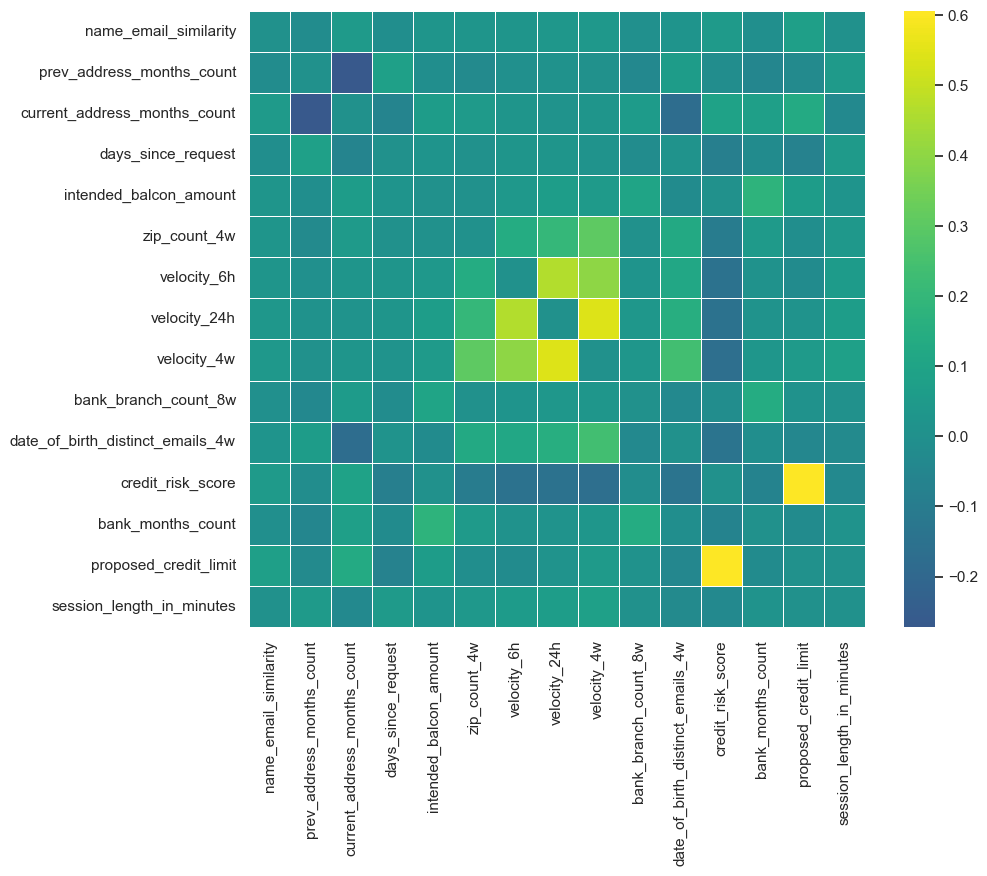

0

In [15]:
get_corr_matrix(dataset = df_base[list_num_vars],
                metodo='pearson', size_figure=[10,8])

Observamos la correlación de las variables numéricas, y vemos que no están muy correlacionadas. Si hubiese alguna muy correlacionada la deberíamos eliminar.

In [16]:
corr = df_base[list_num_vars].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.6]

,level_0,level_1,correlation
206,proposed_credit_limit,credit_risk_score,0.606141


Observamos que las variables más correlacionadas son las de 'proposed_credit_limit' y 'credit_risk_score', pero no tienen una correlación demasiado alta como para considerar borrar una de las dos variables, por lo que seguimos con el preprocesamiento sin borrar ninguna variable.

### Missing Values

In [17]:
# Inicializar un DataFrame vacío para almacenar el porcentaje de valores missing para cada variable
missing_vals = pd.DataFrame()

# Lista de variables para verificar los valores missing    
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# Para cada variable, reemplazar los valores -1 con NaN, calcular el porcentaje de valores missing y agregarlo al DataFrame missing_vals
for feature in missing_features:
    df_base.loc[df_base[feature] < 0, feature] = np.nan  
    missing_vals_col = df_base.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            74.09              25.23   
1                            88.38              37.54   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.20                       0.04  
1                                0.16                       0.04  


Analizamos el porcentaje de valores missing en las columnas seleccionadas, comparando los valores de nuestra variable target 'fraud_bool

In [18]:
# Reorganizar el DataFrame missing_vals de un formato ancho a largo
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Restablecer el índice y renombrar las columnas
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         71.06
1      prev_address_months_count           1         91.89
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.13
4         intended_balcon_amount           0         74.09
5         intended_balcon_amount           1         88.38
6              bank_months_count           0         25.23
7              bank_months_count           1         37.54
8      session_length_in_minutes           0          0.20
9      session_length_in_minutes           1          0.16
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.04


Esta es otra manera de ver el porcentauje de valores missing

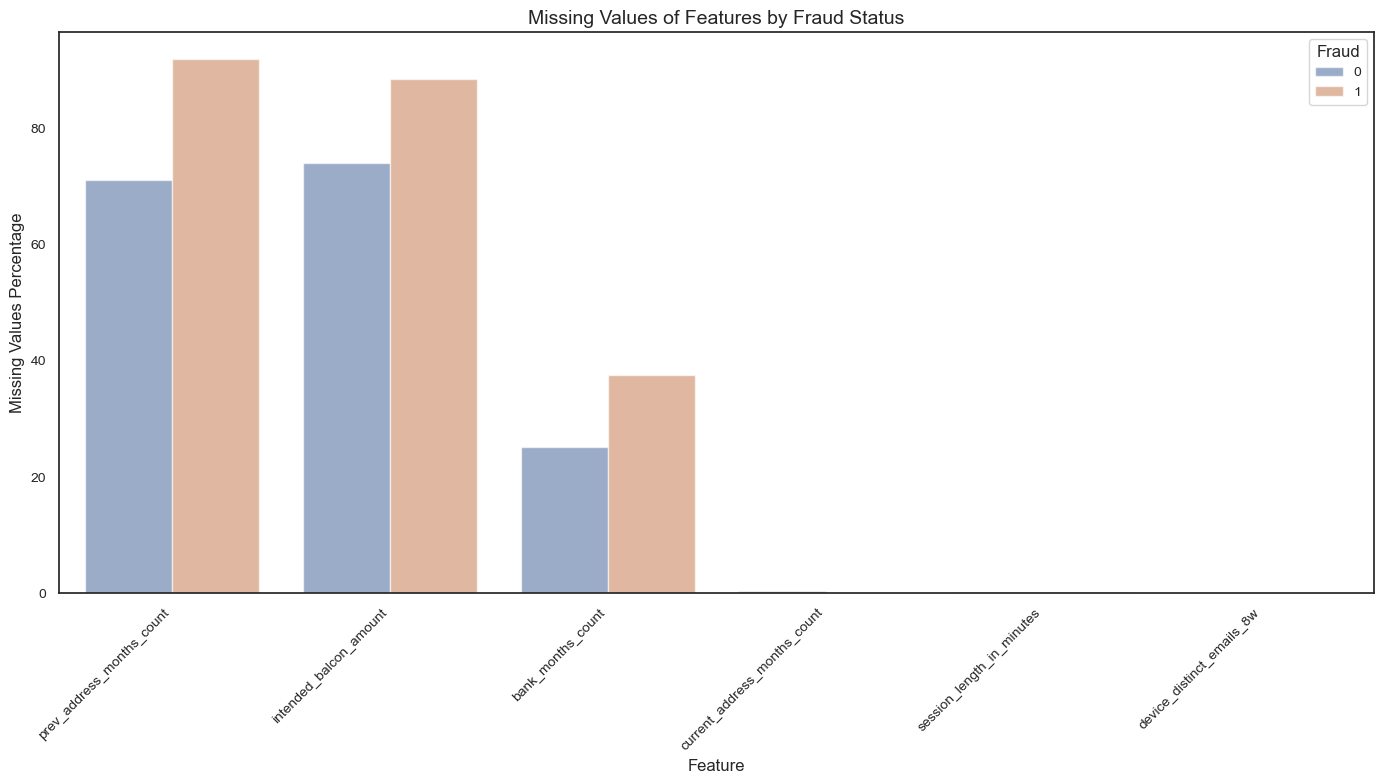

In [19]:
# Ordenar el marco de datos por la columna 'missing_vals' en orden descendente
missing_vals_sorted = missing_vals.sort_values(by='missing_vals', ascending=False)

# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de barras
ax = sns.barplot(data=missing_vals_sorted, x="feature", y="missing_vals", hue="fraud_bool", alpha=0.6)

# Personalizar etiquetas y leyenda
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values Percentage", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotar las etiquetas para mejor visibilidad
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Ajustar el diseño para mejorar la visibilidad de las etiquetas
plt.tight_layout()

# Ajustar los márgenes para evitar que los nombres se corten
plt.margins(x=0.02)

# Ajustar automáticamente las etiquetas del eje x para evitar superposiciones
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)

# Mostrar el gráfico
plt.show()


Manera visual de ver el porcentaje de valores missing. Observamos que las variables 'prev_adress_months', 'intended_balcon_amount' y 'bank_months_count' tienen gran cantidad de valores missing, lo cual nos hace pensar que esas variables pueden ser eliminadas

In [21]:
porc = 100*df_base.isna().mean()
porc_na = porc[porc>0]

print("Porcentaje de datos nulos:\n",porc_na)

Porcentaje de datos nulos:
 prev_address_months_count       71.2920
current_address_months_count     0.4254
intended_balcon_amount          74.2523
bank_months_count               25.3635
session_length_in_minutes        0.2015
device_distinct_emails_8w        0.0359
dtype: float64


Analizamos el porcentaje de valores missing de las variables en su conjunto, comparado con sus datos

Cuando se examinan características como `prev_address_months_count`, `intended_balcon_amount`, and `bank_months_count`, se hace evidente que existe un número considerable de valores missing en su distribución original. Sin embargo, a pesar de estos valores missing, estas características aún tienen valor informativo y muestran correlación con la variable objetivo.

Es importante destacar que los valores missing en estas características están representados por valores negativos y no fueron transformados en valores missing explícitos durante el preprocesamiento. El impacto potencial de tal transformación no ha sido evaluado, ya que podría resultar en la pérdida de información, aunque los valores negativos en sí mismos no poseen un significado específico.

### Outliers

In [22]:
# Seleccionar solo las columnas numéricas
numeric_features = df_base.select_dtypes(include=np.number).columns

# Convertir las columnas seleccionadas a un array de NumPy
numeric_features_array = df_base[numeric_features].values

# Calcular outliers y la cantidad de outliers
is_outlier = np.abs(numeric_features_array - numeric_features_array.mean(axis=0)) > 3.0 * numeric_features_array.std(axis=0)
num_outliers = np.sum(is_outlier, axis=0)

# Mostrar resultados
outlier_columns = is_outlier.any()
num_outliers_per_column = pd.Series(num_outliers, index=numeric_features)

outlier_columns, num_outliers_per_column

(True,
 fraud_bool                          11029
 income                                  0
 name_email_similarity                   0
 prev_address_months_count               0
 current_address_months_count            0
 customer_age                         7890
 days_since_request                  17775
 intended_balcon_amount                  0
 zip_count_4w                        16247
 velocity_6h                          4341
 velocity_24h                          539
 velocity_4w                             0
 bank_branch_count_8w                40984
 date_of_birth_distinct_emails_4w     6258
 credit_risk_score                    3471
 email_is_free                           0
 phone_home_valid                        0
 phone_mobile_valid                      0
 bank_months_count                       0
 has_other_cards                         0
 proposed_credit_limit                6155
 foreign_request                     25242
 session_length_in_minutes               0
 kee

Se examinó la presencia de outliers en las columnas numéricas, observando que la mayoría carece de outliers significativos. En los casos donde se identificaron outliers, su incidencia no supera el 2% del total de datos en esas columnas. Posteriormente analizaremos más en detalle los outliers, y decidiremos qué hacer con ellos

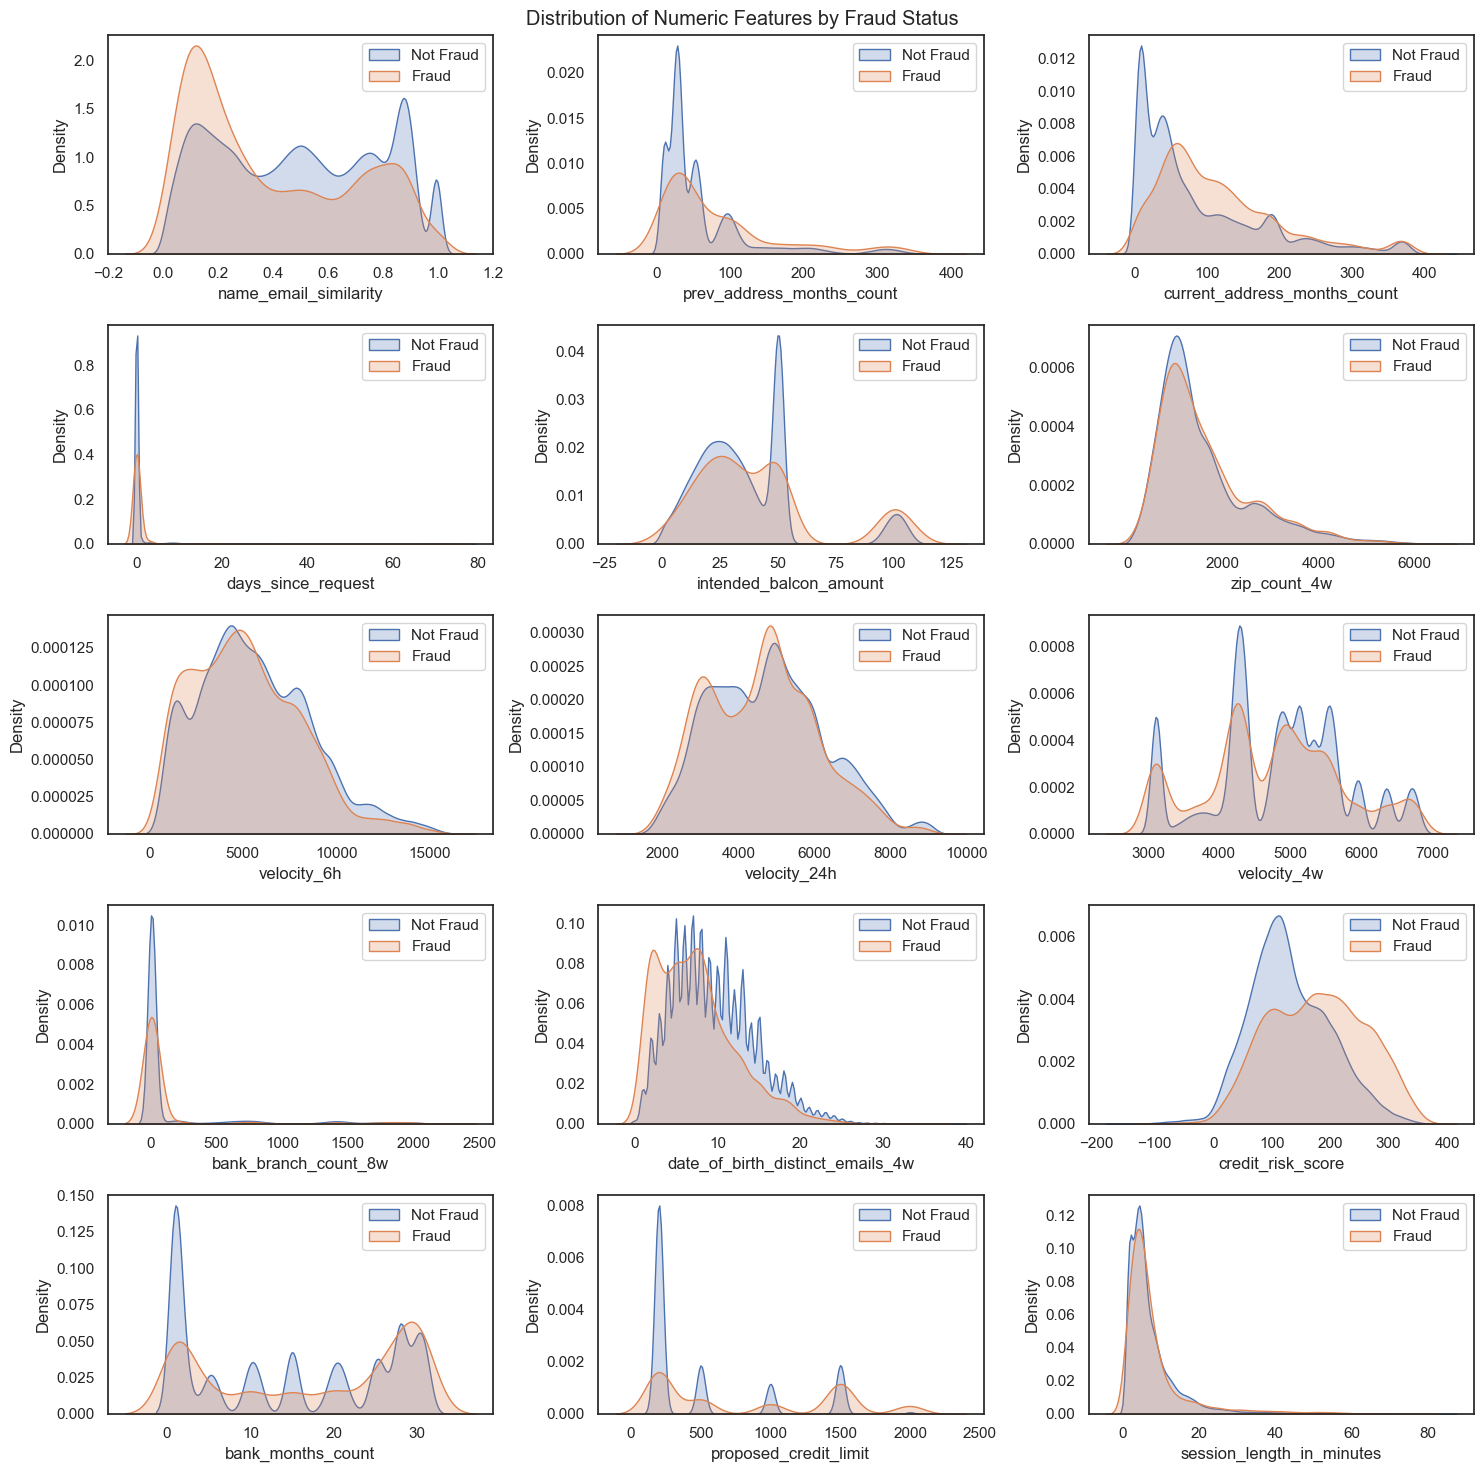

In [23]:
# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Añadir un título a la figura
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Recorrer las características numéricas y trazar un gráfico de densidad de kernel para cada característica
for i, feature in enumerate(list_num_vars):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df_base[df_base['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df_base[df_base['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Visualizamos las distribuciones de las variables numéricas en función del estado de fraude. Cada gráfico de densidad compara la forma y densidad de las distribuciones de las características numéricas entre transacciones clasificadas como no fraudulentas y fraudulentas. Proporcionan información sobre posibles patrones o discrepancias en los datos numéricos en relación con la variable de interés, el fraude. Además, ayudan a entender la variabilidad y superposición de las distribuciones entre las dos categorías, lo que puede ser crucial para la identificación de características importantes en la detección de fraudes.


-Name_email_similarity: muestran una distribución bimodal, lo que indica que hay dos grupos principales en la similitud. Un grupo tiene valores más bajos y el otro tiene valores más altos. Los valores más altos indican que hay una mayor similitud entre los nombres de correo electrónico.

-Prev_adress_month_count: la mayoría de las transacciones, tanto fraudulentas como no fraudulentas, tienen pocos meses en la dirección previa. Indica que las personas tienden a mudarse con frecuencia, sin una clara diferencia entre fraude y no fraude.

-Current_adress_month_count: similar al gráfico anterior, sugiere que la mayoría de las personas han vivido en su dirección actual durante pocos meses. No muestra una clara diferencia entre fraudes y no fraudes.

-Days_since_request: muestra una concentración de transacciones con pocos días desde la solicitud. No hay apenas diferencia entre fraude y no fraude.

-Intended_balcon_amount: dos grupos notables, uno con montos bajos, centrados alrededor de 50, y otro con montos más altos centrados alrededor de 100. Se puede destacar que en el segundo grupo, abundan más los casos de fraude, lo cual puede ser un indicio.

-Zip_count_4w: mayor concentración en códigos postales entre 1000 y 2000, sugiriendo áreas geográficas específicas. No hay apenas diferencia entre fraude y no fraude.

-Velocity_6h: muestra una velocidad creciente en las primeras horas, y luego disminuyendo. Ambos casos son muy similares.


-Velocity_24h: muy similar al caso anterior, y no hay gran diferencia entre fraude y no fraude.

-Velocity_4w: presenta picos notables y disminuciones en la velocidad. La distribución es bastante parecida entre fraude y no fraude.

-Bank_branch_count_8w: mayor concentración en números bajos, indicando que la mayoría de las transacciones apenas involucran sucursales bancarias. No hay una clara diferencia entre fraude y no fraude.

-Date_of_birth_distinct_emails_4w: se observa una prevalencia de cumpleaños en la primera quincena del mes en ambas categorías, no fraude y fraude. Sin embargo, es notable que el fraude se destaca principalmente en los primeros 5 días del mes, con una disminución significativa en la segunda quincena. En contraste, las transacciones no fraudulentas, aunque también muestran una disminución en la segunda quincena, presentan una mayor cantidad de datos en comparación con el fraude. Este patrón sugiere que la distribución de cumpleaños puede ser un indicador relevante, especialmente debido a la concentración de fraudes en los primeros días del mes.

-Credit_risk_score: ambos grupos muestran un aumento gradualen las puntuaciones de riesgo crediticio. Es evidente que las transacciones fraudulentas tienden a tener puntuaciones más altas en general, sugiriendo un mayor riesgo asociado con estas transacciones. Por otro lado, las transacciones no fraudulentas muestran una concentración alrededor del valor 100, indicando una menor percepción de riesgo crediticio en comparación con las transacciones fraudulentas.

-Bank_months_count: Indica que la mayoría de las personas han estado afiliadas al banco por un período moderado, aunque las personas en el grupo de fraude suelen tener una afiliación más prolongada.

-Proposed_credit_limit: diferencias significativas entre los grupos. No fraudulentas tienden a tener límites más bajos y uniformes, mientras que las fraudulentas muestran mayor variabilidad y límites más altos. Con los resultados de este gráfico podemos decir que los individuos fraudulentos suelen solicitar un límite de crédito propuesto más alto que los individuos no fraudulentos.

-Session_lenght_in_minutes: ambos grupos tienen distribuciones de duración de sesión similares. La similitud en la distribución podría indicar que la duración de la sesión no es un fuerte indicador de fraude.

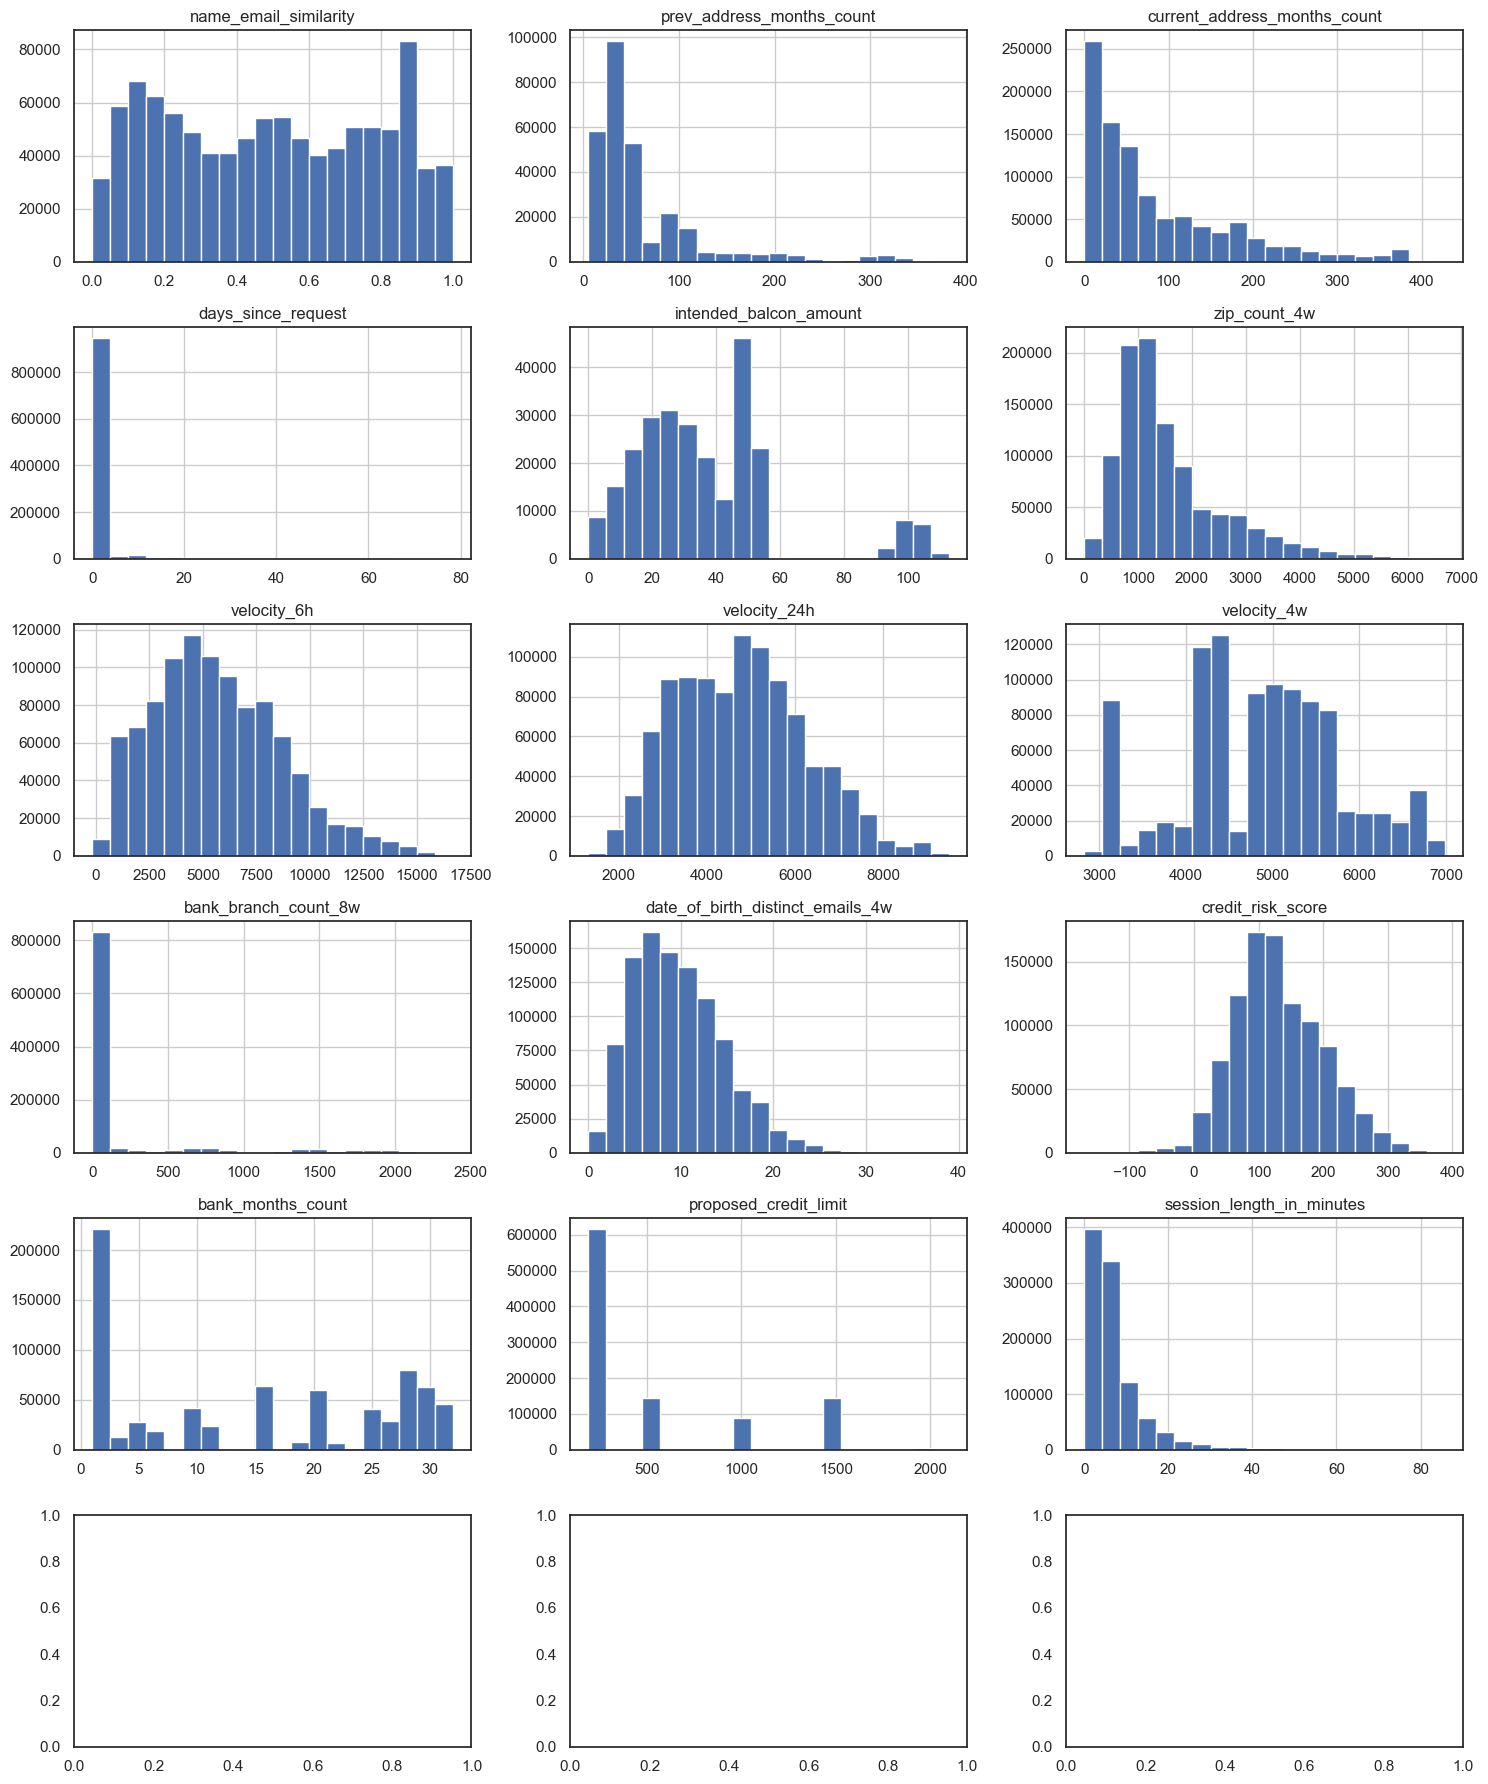

In [24]:
plot_histograms(df_base, list_num_vars)

Esta función facilita la visualización simultánea de los histogramas de varias variables numéricas, lo que puede ser útil para comprender la forma y la dispersión de sus distribuciones en el conjunto de datos.

-Name_email_similarity: presenta una distribución constante

-Prev_adress_month_count: tiene una gran concentración inicial que significa que hay gran cantidad de solicitudes donde las personas tienen un número bajo de meses viviendo en una dirección previa. A medida que el número de meses aumenta, la frecuencia de solicitudes disminuye, lo que podría interpretarse como un indicio de que las personas tienden a cambiar de dirección con cierta frecuencia, con una minoría que ha vivido en direcciones previas por períodos más prolongados. 

-Current_adress_month_count: similar al gráfico anterior, la concentración inicial podría indicar que hay una proporción significativa de casos con un número bajo de meses viviendo en la dirección actual. Esto podría interpretarse como una tendencia hacia la movilidad residencial, con la mayoría de las personas viviendo en direcciones actuales por períodos más cortos.

-Days_since_request: hay una frecuencia significativa de solicitudes recientes.

-Intended_balcon_amount: hay dos grupos, los que tienen montos previstos más bajos, alcanazndo su máximo en 50, y los que tienen montos más altos en torno a 100. Este patrón indica una división clara en las preferencias de los solicitantes en cuanto al monto previsto. La presencia de dos grupos podría tener implicaciones significativas en términos de segmentación de clientes o comportamientos financieros, donde un grupo muestra preferencia por montos más bajos y otro por montos más altos para esta variable específica.

-Zip_count_4w: observamos que los códigos postales entre 1000 y 2000 tienen la frecuencia más alta de solicitudes, indicando que hay una concentración significativa de actividad en esa región específica durante el período de 4 semanas considerado. Esta concentración podría sugerir una demanda particularmente fuerte o una mayor actividad en esa área geográfica específica en comparación con otros códigos postales.

-Velocity_6h: observamos un crecimiento inicial seguido de una disminución pronunciada, podría indicar que hay momentos específicos dentro de las primeras 6 horas donde la frecuencia de solicitudes es más alta, seguido por períodos de menor actividad. Esto podría sugerir patrones diarios o picos de actividad relacionados con eventos específicos, como horas pico de uso del sistema.

-Velocity_24h: observamos un crecimiento inicial seguido de un pico y una disminución. El pico significa que hay una mayor actividad durante las horas del medio del día. Este patrón podría asociarse con momentos de mayor demanda o interacción en el sistema al mediodía.

-Velocity_4w: observamos que no sigue ningún patrón específico. Los picos o variaciones en este caso podrían deberse a eventos recurrentes en el transcurso de las 4 semanas. Esto podría relacionarse con tendencias semanales, como un aumento de solicitudes durante los fines de semana o eventos regulares que generan actividad en un patrón específico. 

-Bank_branch_count_8w: la mayoría de los casos tienen números muy bajos de sucursales bancarias en las últimas 8 semanas, indicando una baja diversidad en el uso de sucursales.

-Date_of_birth_distinct_emails_4w: observamos que el día de naciemiento de la mayoría de las personas es en la primera quincena del mes, entre el 7 y el 12 para ser más exactos.

-Credit_risk_score: la distribución sugiere una concentración de casos con riesgo crediticio moderado, ya que los valores crecen progresivamente hasta un punto máximo y luego disminuyen.

-Bank_months_count: sugiere que la mayoría de las personas tienen una afiliación relativamente corta al banco. Este patrón podría indicar que la mayoría de las solicitudes provienen de nuevos clientes o personas que se han afiliado al banco recientemente.

-Proposed_credit_limit: la presencia de una barra significativa alrededor de 100 sugiere que la mayoría de personas tiene propuestas de límites de crédito en torno a esa cifra. Este puede ser un límite inicial estándar o una preferencia común de límite de crédito para este conjunto de datos.

-Session_lenght_in_minutes: la duración de las sesiones suele ser bastante corta, y va decreciendo progresivamente. Esto podría indicar que los usuarios están encontrando rápidamente la información o realizando las acciones que buscan. Podría ser positivo si es un reflejo de la eficiencia y facilidad de uso del sistema.

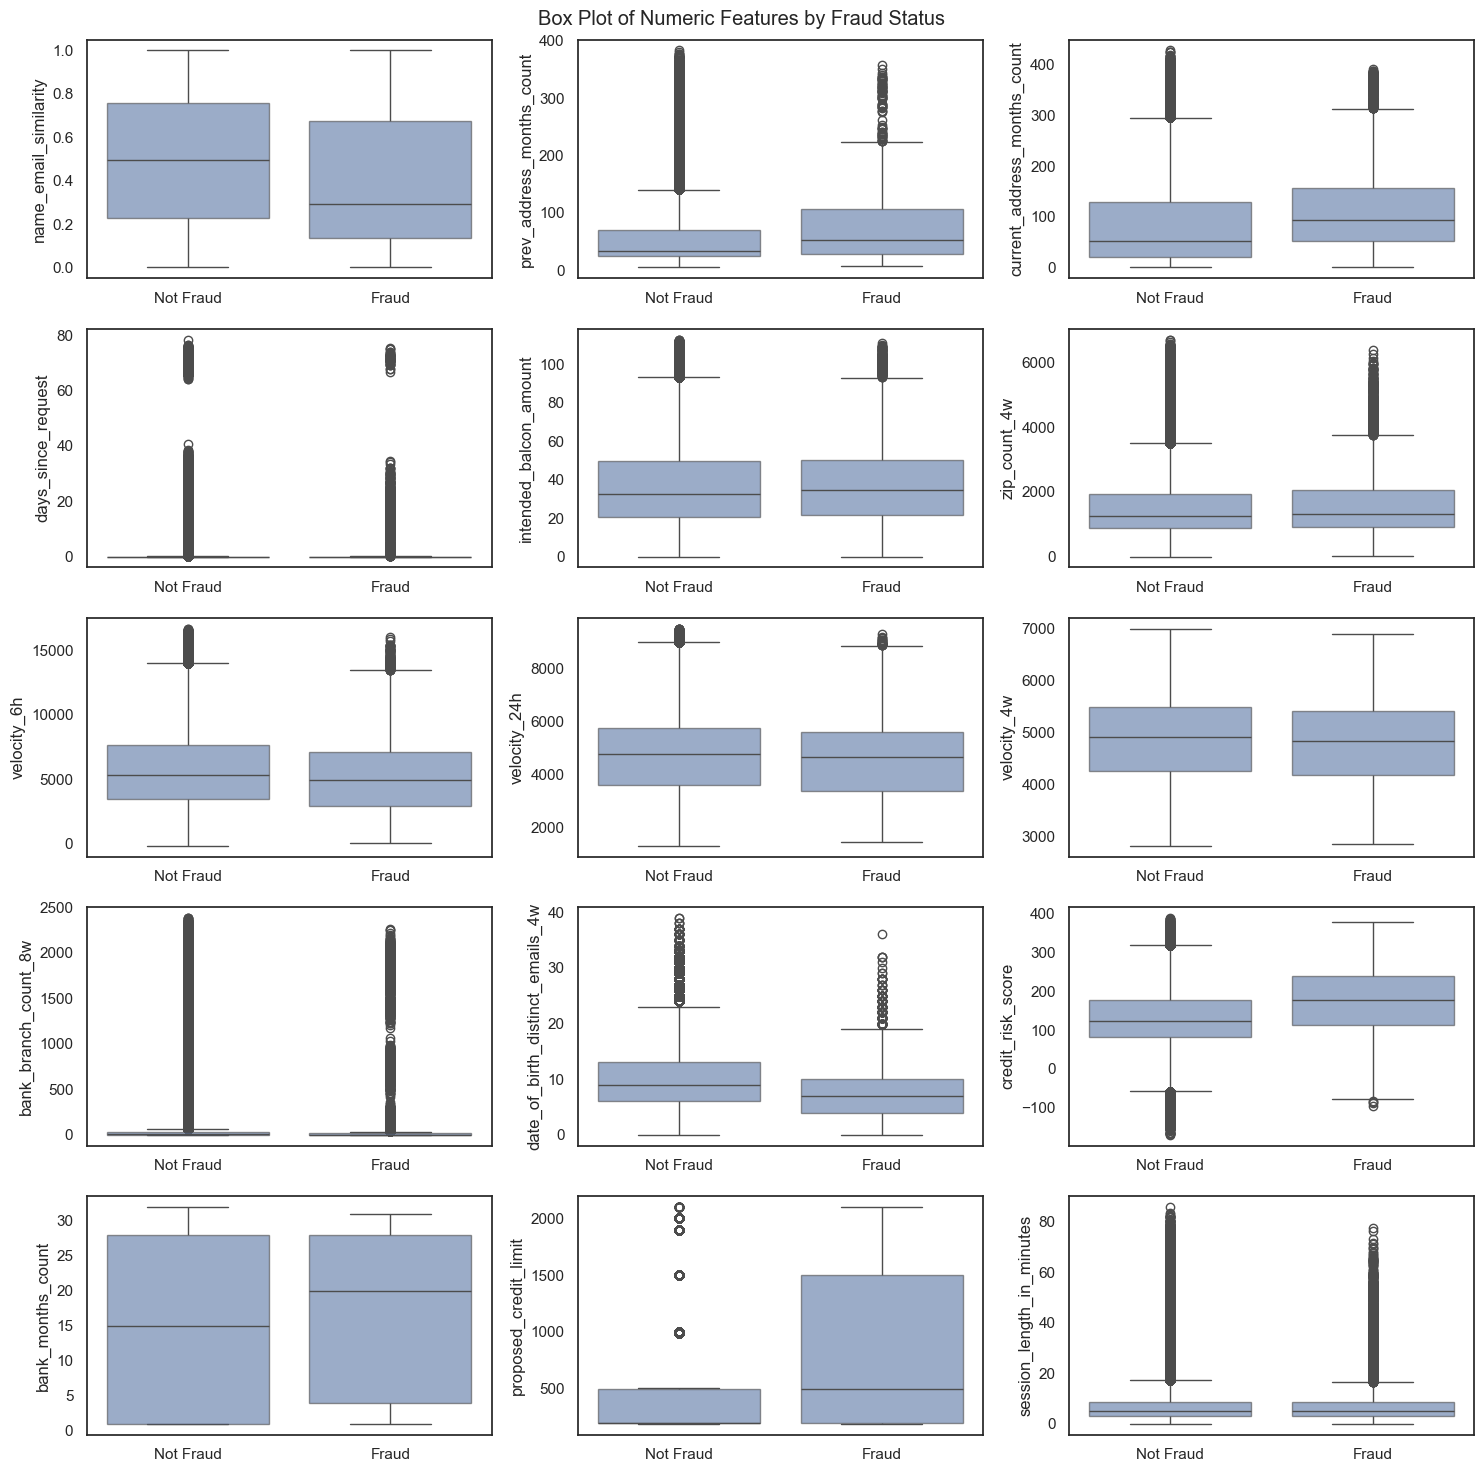

In [25]:
# Crear una cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Agregar un título a la figura
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Recorrer las características numéricas y trazar un boxplot para cada variable
for i, feature in enumerate(list_num_vars):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df_base, x='fraud_bool', y=feature, ax=ax, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    
    # Establecer las posiciones y etiquetas de las marcas en el eje x
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Visualizamos un conjunto de boxplots acerca de la distribución de las variables numéricas, en relación al estado de fraude.
Cada boxplot representa la dispersión estadística de los valores numéricos, permitiendo identificar la presencia de outliers y comparar cómo varían estos valores entre las transacciones fraudulentas y no fraudulentas. Esto nos facilita la identificación de posibles patrones o discrepancias en los datos, especialmente en términos de outliers, y contribuyen a una comprensión más profunda de la relación entre estas variables y la variable objetivo de fraude.

-Name_email_similarity: en ambos casos no se observan outliers. Esta tendencia sugiere que, en promedio, las transacciones fraudulentas presentan una similitud menor en los nombres de los correos electrónicos en comparación con las transacciones legítimas. Esta diferencia podría indicar un comportamiento distintivo que merece una mayor atención en la detección de actividades fraudulentas, ya que los atacantes a menudo intentan minimizar la similitud para evadir la detección.

-Prev_adress_month_count: ambos conjuntos de datos muestran una amplia variabilidad, con bastantes outliers. Sin embargo, se observa una mayor presencia de valores atípicos en el caso de 'No Fraude'. Esta diferencia podría indicar que, en promedio, las transacciones fraudulentas tienden a involucrar a personas que han residido por períodos más largos en direcciones anteriores. 

-Current_adress_month_count: ambos conjuntos de datos exhiben variabilidad en la distribución, con la presencia de outliers. Y al igual que en el gráfico anterior, se observa una cantidad significativamente mayor de valores atípicos en el caso de no fraude. Este hallazgo sugiere que, en promedio, las transacciones fraudulentas involucran a personas que han permanecido en su dirección actual por períodos más prolongados en comparación con las transacciones legítimas.

-Days_since_request: al analizar los boxplots, se observa que, para las transacciones etiquetadas como 'No Fraude' y 'Fraude', la mayoría de las observaciones se concentran alrededor de 0, indicando que ha pasado muy poco tiempo desde la última solicitud. Aunque debemos destacar que en ambos casos hay una gran cantidad de outliers.

-Intended_balcon_amount: al analizar los boxplots, se observa que en ambos casos las distribuciones son bastante similares. La mayoría de las observaciones se concentran en rangos moderados. Un aspecto destacado es la presencia significativa de outliers a partir de 90 en ambos conjuntos de datos. Esta similitud sugiere que, independientemente de la categoría de fraude, existe una tendencia común de algunas transacciones que intentan retirar cantidades excepcionalmente altas.

-Zip_count_4w: ambos boxplots presentan una distribución muy similar. Hay que destacar la presencia de outliers a partir de 4000 en ambos casos.

-Velocity_6h: al analizar los boxplots, se destaca una similitud tanto para las transacciones de no fraude como de fraude. Hay que destacar la presencia de outliers en ambos casos.

-Velocity_24h: ambos boxplots presentan una distribución muy similar. Hay que destacar la presencia de outliers  en ambos casos.

-Velocity_4w: al analizar los boxplots, se observa una similitud tanto para las transacciones de no fraude como de fraude. Es destacable que en ninguno de los conjuntos de datos se identifican outliers, lo cual sugiere que la velocidad de solicitud se mantiene relativamente constante durante este periodo.

-Bank_branch_count_8w: en ambos conjuntos de datos, los boxplots son líneas pegadas al 0, indicando que la mayoría de las transacciones apenas involucran sucursales bancarias.

-Date_of_birth_distinct_emails_4w: ambos boxplots son similares, y presentan outliers. Lo más habitual es que el cumpleaños sea en la primera quincena del mes.

-Credit_risk_score: se aprecia una similitud en la distribución de las puntuaciones de riesgo crediticio en ambos casos, aunque las transacciones fraudulentas tienden a tener valores más altos en general. No obstante, al analizar la presencia de outliers, se destaca una distinción significativa. Mientras que las transacciones fraudulentas tienden a recibir puntuaciones de riesgo más bajas, las transacciones no fraudulentas exhiben una variabilidad más amplia, caracterizada por un número significativo de outliers con puntuaciones excepcionalmente altas. Este patrón sugiere que, aunque las puntuaciones de riesgo son más altas en general para las transacciones fraudulentas, las transacciones no fraudulentas muestran una diversidad más amplia en la evaluación del riesgo crediticio, incluyendo casos excepcionales con puntuaciones notoriamente elevadas. Esta observación subraya la importancia de considerar tanto los valores típicos como los atípicos al evaluar el riesgo crediticio en distintos contextos.

-Bank_months_count: al analizar los boxplots, se revela una diferencia en la cantidad de meses que las personas han estado afiliadas al banco entre transacciones etiquetadas como 'No Fraude' y 'Fraude'. En el caso de no fraude, podemos concluir que la mayoría de las personas han estado afiliadas al banco por un tiempo moderado. En cambio, en fraude, podemos decir que las personas involucradas en transacciones fraudulentas tienden a tener una afiliación más prolongada al banco en comparación con las no fraudulentas. Es relevante destacar que no se observan outliers en ninguno de los conjuntos de datos, indicando que la distribución de la duración de la afiliación al banco es consistente y no presenta valores atípicos.

-Proposed_credit_limit: este gráfico evidencia una marcada disparidad en los límites de crédito propuestos entre transacciones catalogadas como 'No Fraude' y 'Fraude'. En el caso de 'No Fraude', la mayoría de las personas presentan límites de crédito propuestos bajos. Contrariamente, en el caso de 'Fraude', los valores son más elevados, y la ausencia de outliers destaca la consistencia en estos montos más altos. Esta diferencia sugiere que, mientras que las transacciones no fraudulentas tienden a mantener límites de crédito propuestos más bajos y uniformes (con la excepción de algunos valores atípicos), las transacciones fraudulentas exhiben una variabilidad significativa, con algunos casos mostrando límites de crédito propuestos considerablemente superiores. Dada la magnitud de estas divergencias, esta variable se revela como crucial para la detección de fraudes, subrayando la importancia de considerar el límite de crédito propuesto como un indicador clave en el análisis de riesgos.

-Session_lenght_in_minutes: ambos casos presentan una distribución similar, tanto de los valores típicos como atípicos.

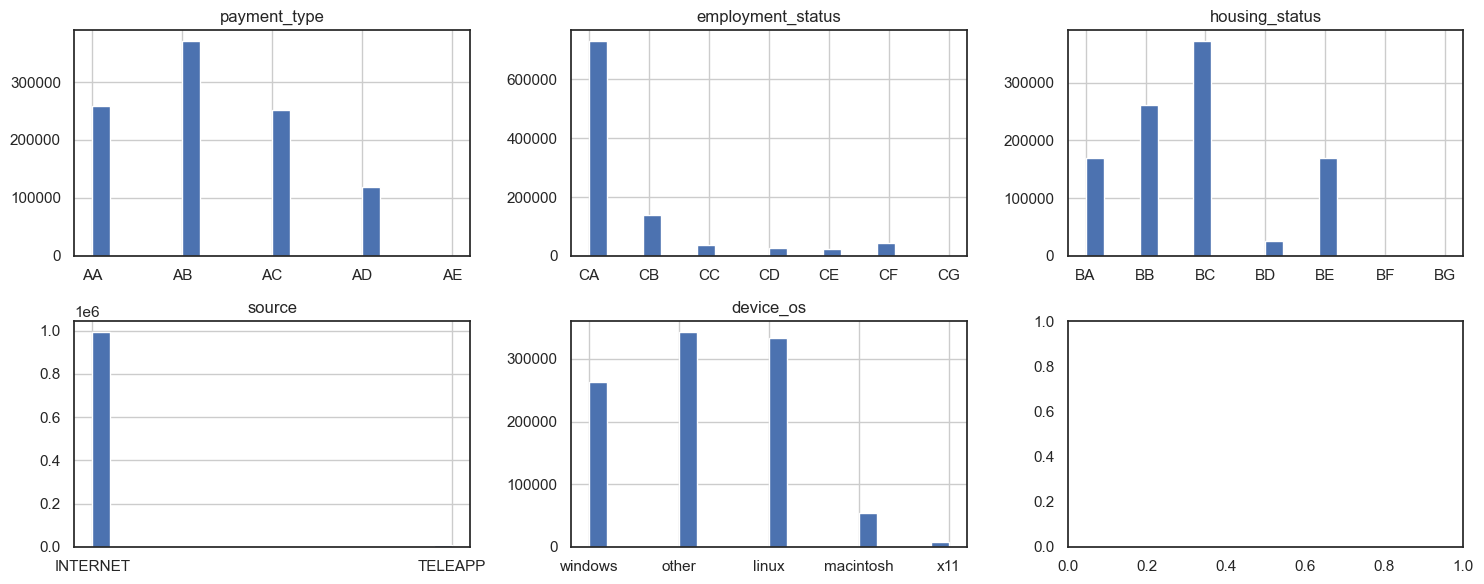

In [26]:
plot_histograms(df_base, list_cat_vars)

Observamos histogramas de las variables categóricas para examinar sus patrones de comportamiento. 

-payment_type: observamos la distribución de los métodos de pago, que nos sirve para ver las preferencias de los usuarios para realizar transacciones. El método dominante es AB, y el menos frecuente AE.

-employment_status: nos muestra la distribución de los estados laborales de los usuarios, que nos puede proporcionar información sobre el perfil financiero de la base de clientes. El valor más frecuente con gran diferencia es CA.

-housing_status: muestra la distribución de los estados de vivienda, y puede ser relevante para evaluar la estabilidad financiera de los clientes. El más abundante es BC.

-source: analiza la fuente de origen de las transacciones, lo que nos porporciona información sobre la diversidad de canales utilizados por los clientes. Presenta únicamente dos valores, siendo 'INTERNET' predominante. Ante esta situación, optaremos por realizar un análisis detallado de esta variable para comprender mejor su influencia y contribución en el conjunto de datos.

-device_os: nos muestra la distribución de sistemas operativos lo cual es relevante para el análisis de seguridad. Destacan claramente linux, other y windows. Si tuviesemos un sistema operativo inusual o menos común, podría indicar una posible actividad sospechosa. 

In [27]:
df_base["source"].value_counts()

INTERNET    992952
TELEAPP       7048
Name: source, dtype: int64

Verificamos que la variable 'source' presenta una distribución casi constante con la predominancia del valor 'INTERNET'. Sin embargo, optamos por no eliminar esta variable debido a que podría contener información relevante en ciertos contextos o escenarios específicos que podrían ser útiles para el modelado o la interpretación de los resultados, reconociendo su posible aporte en la modelización o análisis subsiguiente

Tras analizar este apartado de outliers podemos decir que eliminar valores atípicos en el contexto de datos desequilibrados puede plantear desafíos. Los valores atípicos pueden contener información valiosa o representar instancias raras de la clase minoritaria. Su eliminación puede llevar a la pérdida de información, distorsionar la distribución de clases, introducir sesgo hacia la clase mayoritaria y apartarse de escenarios del mundo real.

Dada la posible repercusión en el rendimiento del modelo, es importante actuar con precaución y explorar enfoques alternativos que preserven la integridad de los datos desequilibrados mientras se abordan los valores atípicos, como técnicas de modelado robustas o métodos de detección de valores atípicos diseñados específicamente para conjuntos de datos desequilibrados.

### Feature Engineering para la detección de fraude

#### One-Hot Encoding  (para variables categóricas)

In [28]:
# Convertir variables categóricas en variables dummy mediante one-hot encoding.
new_df_base = pd.DataFrame(pd.get_dummies(df_base, prefix=list_cat_vars,dtype = int))

In [29]:
new_df_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,0.166828,NaN,88.0,50,0.020925,NaN,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24.0,0,500.0,0,3.888115,0,1.0,0,7,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0.9,0.296286,NaN,144.0,50,0.005418,NaN,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15.0,0,1500.0,0,31.798819,0,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0.9,0.044985,NaN,132.0,40,3.108549,NaN,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,NaN,0,200.0,0,4.728705,0,1.0,0,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0.9,0.159511,NaN,22.0,50,0.019079,NaN,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31.0,1,200.0,0,2.047904,0,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,0.9,0.596414,NaN,218.0,50,0.004441,NaN,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31.0,0,1500.0,0,3.775225,1,1.0,0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [30]:
# Separar la matriz de características y la variable objetivo
X = new_df_base.drop(['fraud_bool'], axis=1)
y = new_df_base['fraud_bool']

El one-hot encoding de variables categóricas es una técnica valiosa que las transforma en un formato adecuado para el aprendizaje automático. Representa cada categoría como una variable binaria, capturando su singularidad e independencia. Al utilizar el one-hot encoding, el algoritmo puede incorporar de manera efectiva la información categórica durante el entrenamiento del modelo. Esto permite realizar predicciones más precisas y tomar decisiones precisas basadas en los valores de las características categóricas.

#### Escalado de variables  (para variables numéricas)

In [31]:
scaler = StandardScaler()
model_scaled = scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [32]:
X_scaled.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1.161747,-1.130538,NaN,0.011740,1.356328,-0.186699,NaN,-0.799396,1.656644,-1.105631,-1.079180,-0.398938,-0.696005,0.775101,-1.061670,1.182218,-2.839755,0.792636,-0.535706,-0.032511,-0.160921,-0.457429,-1.167806,-0.107735,0.0,1.679338,1.694766,-0.767267,-0.580539,-0.367238,-0.017002,0.607775,-0.400600,-0.19809,-0.165059,-0.152381,-0.214621,-0.021289,2.212153,-0.594236,-0.769883,-0.163902,-0.451182,-0.040888,-0.015877,0.08425,-0.08425,-0.706118,-0.238512,-0.722108,1.671819,-0.085327
1,1.161747,-0.682778,NaN,0.645158,1.356328,-0.189580,NaN,-1.200242,-1.705086,-1.418907,-1.882957,1.161029,-1.291978,1.837071,0.941912,-0.845868,-2.839755,0.011917,-0.535706,2.018520,-0.160921,3.017502,-1.167806,-0.107735,0.0,1.679338,-0.590052,1.303327,-0.580539,-0.367238,-0.017002,0.607775,-0.400600,-0.19809,-0.165059,-0.152381,-0.214621,-0.021289,2.212153,-0.594236,-0.769883,-0.163902,-0.451182,-0.040888,-0.015877,0.08425,-0.08425,-0.706118,-0.238512,-0.722108,1.671819,-0.085327
2,1.161747,-1.551956,NaN,0.509426,0.524782,0.387014,NaN,-0.698936,-0.537241,-1.268351,-1.844589,-0.398938,0.893255,0.660293,0.941912,-0.845868,0.352143,NaN,-0.535706,-0.647820,-0.160921,-0.352774,-1.167806,-0.107735,0.0,1.679338,-0.590052,-0.767267,1.722538,-0.367238,-0.017002,-1.645346,2.496254,-0.19809,-0.165059,-0.152381,-0.214621,-0.021289,2.212153,-0.594236,-0.769883,-0.163902,-0.451182,-0.040888,-0.015877,0.08425,-0.08425,-0.706118,-0.238512,1.384834,-0.598151,-0.085327
3,1.161747,-1.155844,NaN,-0.734788,1.356328,-0.187041,NaN,-0.758615,-0.733783,-0.483280,-1.993885,3.778380,-0.696005,-0.301221,0.941912,-0.845868,0.352143,1.399862,1.866694,-0.647820,-0.160921,-0.686538,-1.167806,-0.107735,0.0,1.679338,-0.590052,1.303327,-0.580539,-0.367238,-0.017002,0.607775,-0.400600,-0.19809,-0.165059,-0.152381,-0.214621,-0.021289,2.212153,-0.594236,-0.769883,-0.163902,-0.451182,-0.040888,-0.015877,0.08425,-0.08425,1.416193,-0.238512,-0.722108,-0.598151,-0.085327
4,1.161747,0.355278,NaN,1.482175,1.356328,-0.189762,NaN,-0.679043,-0.214315,-1.380157,-1.922776,3.928502,-1.490635,2.353706,0.941912,1.182218,-2.839755,1.399862,-0.535706,2.018520,-0.160921,-0.471484,0.856307,-0.107735,0.0,1.679338,-0.590052,1.303327,-0.580539,-0.367238,-0.017002,0.607775,-0.400600,-0.19809,-0.165059,-0.152381,-0.214621,-0.021289,2.212153,-0.594236,-0.769883,-0.163902,-0.451182,-0.040888,-0.015877,0.08425,-0.08425,-0.706118,4.192658,-0.722108,-0.598151,-0.085327


El escalado de variables con StandardScaler proporciona un marco uniforme para las características numéricas, facilitando un entrenamiento más efectivo y mejorando la capacidad predictiva de los modelos.

### Selección variables

#### Resampling for Effective Feature Selection Tests

In [33]:
# Creamos una lista para variables categoricas en el DataFrame X_scaled
categorical_features = [feature for feature in X_scaled.columns if X_scaled[feature].nunique() >= 2 and X_scaled[feature].nunique() < 10]

print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [34]:
# Creamos una lista para variables numéricas en el DataFrame X_scaled
numeric_features = [feature for feature in X_scaled.columns if X_scaled[feature].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


#### Variance Threshold Test

In [35]:
# Instanciar un VarianceThreshold selector y ajustarlo al conjunto de entrenamiento mediante NearMiss-resampled 
selector = VarianceThreshold()
selector.fit(X_scaled)

# Obtener los nombres de las características constantes
constant_features = [feature for feature in X_scaled.columns 
                     if feature not in X_scaled.columns[selector.get_support()]]

# Imprimir los nombres de las características constantes
print(constant_features)

['device_fraud_count']


Observamos que la variable 'device_fraud_count' es constante. Esta constancia implica que la característica no aporta variación discernible a los datos y, por lo tanto, no resulta útil para el modelo. La decisión tomada es eliminar esta característica al final del proceso, una vez que hayamos evaluado la importancia de cada variable

### Laso

In [36]:
X_scaled_sin_NA = X_scaled.apply(lambda x: x.fillna(x.mean()))

In [37]:
sel_lasso = SelectFromModel(Lasso(alpha=0.0000001))   
sel_lasso.fit(X_scaled_sin_NA, y)
selected_feat_lasso = X_scaled_sin_NA.columns[sel_lasso.get_support()]
selected_feat_lasso

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CG', 'housing_status_BA', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'housing_status_

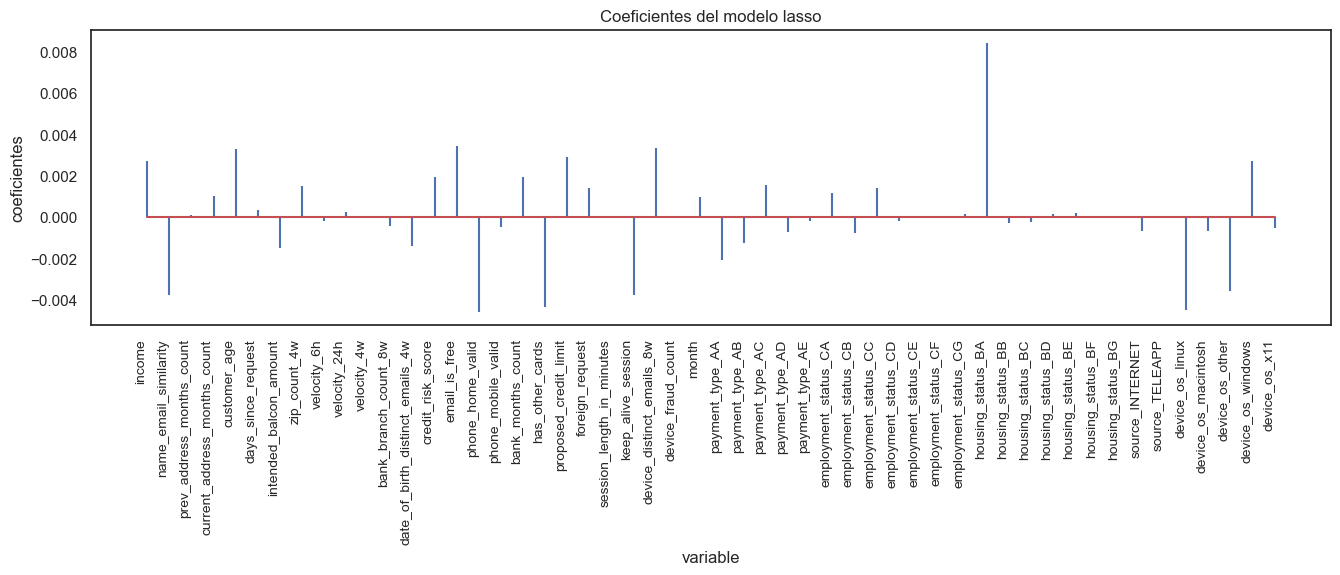

In [38]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes_lasso = pd.DataFrame(
                       {'predictor': X_scaled_sin_NA.columns,
                        'coef': sel_lasso.estimator_.coef_.flatten()}
                 )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo lasso');

El modelo Lasso nos ayuda a visualizar las variables de nuestro modelo que son más importnates, y por ende, más representativas.
Observamos que las variables más importantes son 'housing_status_BA', 'name_email_similarity', 'phone_home_valid', 'has_other_cards', 'keep_alive_session', 'device_os_linux', 'customer_age', 'email_is_free', y 'device_distinct_emails_8w'. Estas variables han sido destacadas debido a sus coeficientes significativos en el modelo y se consideran determinantes para predecir la variable objetivo.

#### Extra tree classifier

In [39]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_sin_NA, y)

# Crea un objeto SelectFromModel con el modelo Random Forest ajustado
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Obtén los nombres de las características seleccionadas llamando a .get_support() en el objeto SelectFromModel.
best_extra_features = [X_scaled_sin_NA.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Imprime los nombres de las características seleccionadas
print(best_extra_features)

['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'month']


El modelo Extra Tree Classifier ha seleccionado las variables que considera más influyentes para predecir la variable objetivo.

In [40]:
extra_importances = pd.DataFrame({'feature': X_scaled_sin_NA.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

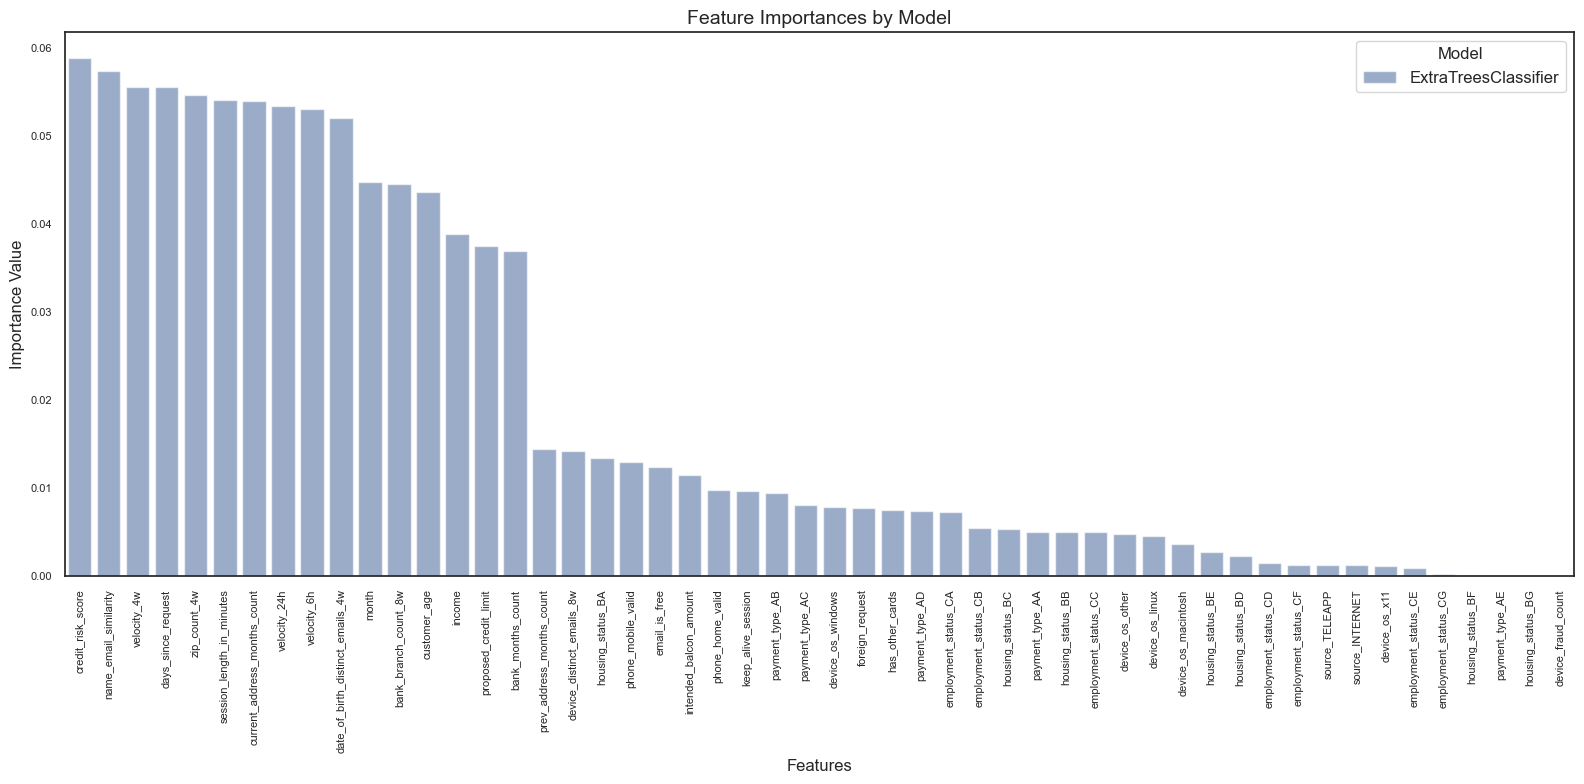

In [41]:
# Preparar el gráfico
plt.figure(figsize=(16, 8))

# Crear un gráfico de barras agrupadas
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", alpha=.6)

# Personalizar etiquetas y leyenda
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Observamos de una manera gráfica la importancia de las variables con respecto a la variable objetivo, utilizando el modelo Extra Trees Classifier

#### Gradient Boosting Classifier

In [42]:
clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=50,
              random_state=2408,
              verbose=1)
clf.fit(X_scaled_sin_NA,y)

      Iter       Train Loss   Remaining Time 
         1           0.1160           13.37m
         2           0.1129           13.20m
         3           0.1107           12.93m
         4           0.1089           13.06m
         5           0.1074           12.99m
         6           0.1059           13.24m
         7           0.1048           13.31m
         8           0.1038           13.18m
         9           0.1029           12.95m
        10           0.1021           12.60m
        20           0.0968           10.00m
        30           0.0939            6.57m
        40           0.0920            3.27m
        50           0.0906            0.00s


GradientBoostingClassifier(max_depth=12, min_weight_fraction_leaf=0.02,
                           n_estimators=50, random_state=2408, verbose=1)

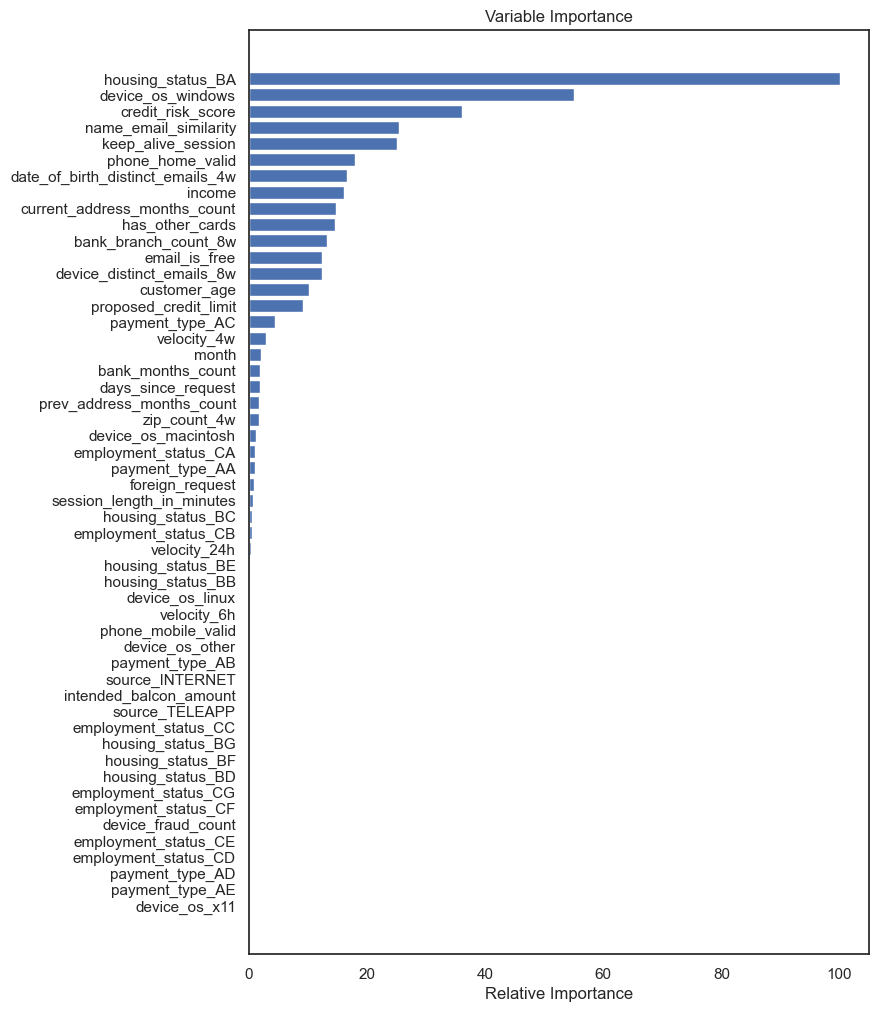

In [43]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_scaled_sin_NA.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

El modelo Gradient Boosting Classifier también nos sirve para evaluar la importancia de las variables, y el gráfico muestra cómo contribuyen estas variables a la predicción de la variable objetivo. Destacan tres variables: 'housing_status_BA', que también fue resaltada por el modelo Lasso; 'device_os_windows', y 'credit_risk_score', que también mostró importancia en el Extra Trees Classifier

### División datos

In [44]:
# Separa la matriz y la variable objetivo
X = new_df_base.drop(['fraud_bool'], axis=1)
y = new_df_base['fraud_bool']

Esta separación es esencial para preparar los datos y poder aplicar modelos, donde 'X' contendrá las características que se utilizarán para hacer predicciones, e 'y' será la variable que se pretende predecir.

In [45]:
#Imputo los valores faltantes con la media
X = X.apply(lambda x: x.fillna(x.mean()))
#Elimino la columna con varianza 0
X.drop(['device_fraud_count'], axis=1, inplace=True)

X.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.9,0.166828,60.719967,88.0,50,0.020925,36.582496,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24.000000,0,500.0,0,3.888115,0,1.0,7,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.9,0.296286,60.719967,144.0,50,0.005418,36.582496,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15.000000,0,1500.0,0,31.798819,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.9,0.044985,60.719967,132.0,40,3.108549,36.582496,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,14.862618,0,200.0,0,4.728705,0,1.0,7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.9,0.159511,60.719967,22.0,50,0.019079,36.582496,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31.000000,1,200.0,0,2.047904,0,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0.9,0.596414,60.719967,218.0,50,0.004441,36.582496,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31.000000,0,1500.0,0,3.775225,1,1.0,7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


En este paso eliminamos la variable 'device_fraud_count' como habíamos mencionado previamente, ya que se trata de una variable constante que no nos aporta nada para nuestro modelo

In [46]:
X.to_csv('../data/X.csv', index=False)
y.to_csv('../data/y.csv', index=False)